<a href="https://colab.research.google.com/github/aarmintia/imdb/blob/main/Data_Strategist_GCash_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference:
https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("viridis")
import pickle
import glob
import os

Mounted at /content/drive


# Title Basics Table

In [ ]:
df_title_basics0 = pickle.load(open("/content/drive/MyDrive/extracted/title.basics.sav","rb"))
df_title_basics0.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"


In [ ]:
df_title_basics0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10613322 entries, 0 to 10613321
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 728.8+ MB


In [ ]:
df_title_basics0['tconst'].nunique()

10613322

Keep movies only in the dataset

In [ ]:
df_title_basics_copy = df_title_basics0.copy()

In [ ]:
df_title_basics = df_title_basics_copy[(df_title_basics_copy.titleType == "movie") | (df_title_basics_copy.titleType == "tvMovie")]

As part of the study, make a dataset for 2019 and earlier movies

In [ ]:
df_title_basics = df_title_basics[df_title_basics['startYear'] < 2020]

In [ ]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628741 entries, 8 to 10613272
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          628741 non-null  object 
 1   titleType       628741 non-null  object 
 2   primaryTitle    628741 non-null  object 
 3   originalTitle   628741 non-null  object 
 4   isAdult         628741 non-null  float64
 5   startYear       628741 non-null  float64
 6   endYear         0 non-null       float64
 7   runtimeMinutes  453938 non-null  object 
 8   genres          552285 non-null  object 
dtypes: float64(3), object(6)
memory usage: 48.0+ MB


Use Scikit-Learn’s CountVectorizer feature extraction technique to detect and count each unique genre (e.g. drama, comedy, etc). We will create a new column for each unique Genre title and **it will be True/False if a movie has that genre or not**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

temp = df_title_basics.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names_out()
unique_genres_np = np.array(unique_genres)
print(unique_genres_np)

['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'film-noir' 'game-show'
 'history' 'horror' 'music' 'musical' 'mystery' 'news' 'reality-tv'
 'romance' 'sci-fi' 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


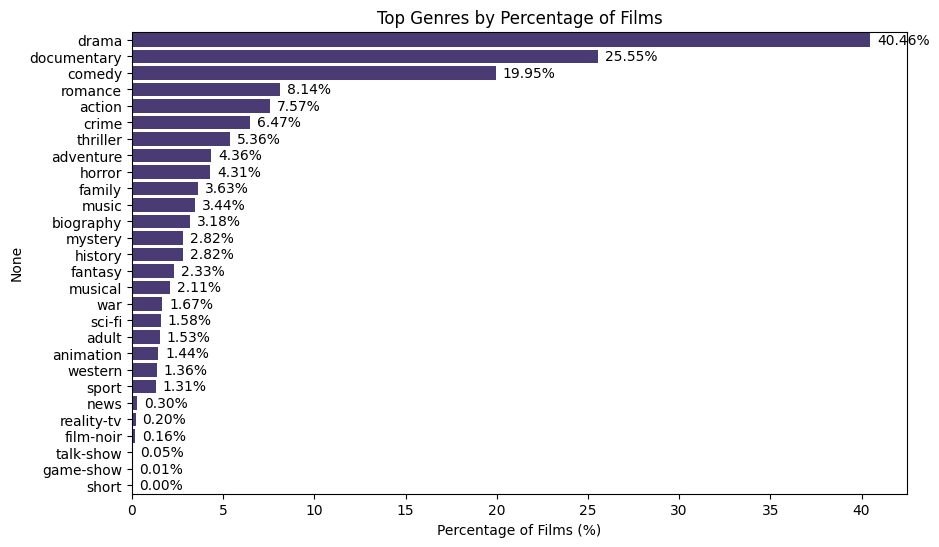

In [ ]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres_np,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]

top5_genres = sorted_genres_perc

plt.figure(figsize=(10,6))
plot = sns.barplot(x=top5_genres.values, y=top5_genres.index, orient="h")

for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}%',
                   (p.get_width(), p.get_y() + p.get_height() / 2),
                   ha='left', va='center',
                   fontsize=10, color='black', xytext=(5, 0),
                   textcoords='offset points')

plt.xlabel("Percentage of Films (%)")
plt.title("Top Genres by Percentage of Films")
plt.show()


# Ratings Table

In [ ]:
df_ratings = pickle.load(open("/content/drive/MyDrive/extracted/title.ratings.sav","rb"))
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2033
1,tt0000002,5.7,272
2,tt0000003,6.5,1977
3,tt0000004,5.4,178
4,tt0000005,6.2,2733


The **ratings** table contains over 1 million movie rating entries.

There are no null values for the ratings table

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412275 entries, 0 to 1412274
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1412275 non-null  object 
 1   averageRating  1412275 non-null  float64
 2   numVotes       1412275 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.3+ MB


The **average rating** is 7 (mean) which is **different from the median** value (7.1). The **average number of votes** is more than a thousand (mean), this time median (26) is **significantly different than the mean**.

In [ ]:
df_ratings.describe()

,averageRating,numVotes
count,1.412275e+06,1.412275e+06
mean,6.955463e+00,1.036110e+03
std,1.385574e+00,1.766918e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.868594e+06


In [ ]:
merged_basics_ratings = pd.merge(df_title_basics, df_ratings, on="tconst")

merged_basics_ratings.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45,Romance,5.3,208
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100,"Documentary,News,Sport",5.2,505
2,tt0000502,movie,Bohemios,Bohemios,0.0,1905.0,NaN,100,NaN,4.1,15
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70,"Action,Adventure,Biography",6.0,874
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90,Drama,5.5,23


In [ ]:
merged_basics_ratings.shape

(316227, 11)

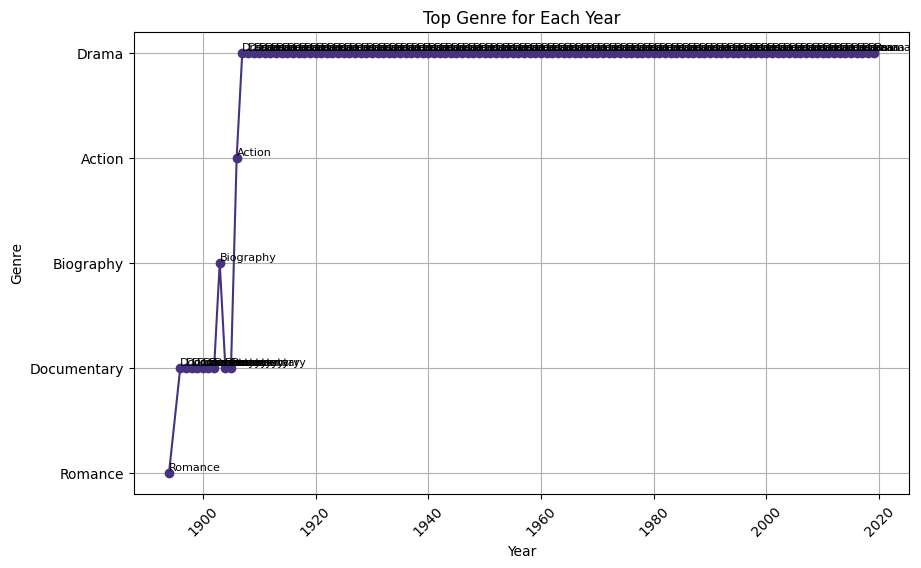

In [ ]:
import matplotlib.pyplot as plt

merged_basics_ratings = merged_basics_ratings.dropna(subset=['genres'])

merged_basics_ratings = merged_basics_ratings.assign(genres=merged_basics_ratings['genres'].str.split(',')).explode('genres')

top_genre_per_year = merged_basics_ratings.groupby('startYear')['genres'].agg(lambda x: x.value_counts().idxmax())

plt.figure(figsize=(10, 6))
plt.plot(top_genre_per_year.index, top_genre_per_year.values, marker='o', linestyle='-')

for year, genre in top_genre_per_year.items():
    plt.text(year, genre, genre, horizontalalignment='left', verticalalignment='bottom', fontsize=8)

plt.title('Top Genre for Each Year')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

